Pemodelan Pemenang Penghargaan All-NBA Menggunakan *Machine Learning*
---
**Tugas Akhir Mata Kuliah *Reseach and Methodology***

**Dibuat Oleh:**
- Dennis Jonathan (23101910027)

*S1 Business Mathematics 2019 - Universitas Prasetiya Mulya*

## 1. Pendahuluan

### 1.1. Mengimpor *Library* yang Dibutuhkan

In [1]:
# Mengimpor library data processing dan analisis numerik
import pandas as pd
import numpy as np
from data_processing import *

# Mengimpor library untuk membuat grafik
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# Mengimpor fungsi preprocessing dan oversampling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

# Megimpor library pemodelan Regresi Logistik
import statsmodels.api as sm
from logreg_functions import *

# Mengimpor fungsi pemodelan Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Mengimpor library pemodelan Neural Network
import tensorflow as tf
import tensorflow_addons as tfa
from nn_functions import *

# Mengimpor fungsi untuk mengevaluasi model
from model_evaluation import *

# Mengimpor fungsi untuk tes hipotesa
from scipy.stats import binom_test

# Memedamkan peringatan dari Python
import warnings
warnings.filterwarnings('ignore')

# Setting matplotlib
%matplotlib inline

### 1.2. Mengimpor Data *Advanced Statistics* untuk *Training* dan *Development*

In [2]:
# Membaca data advanced statistics masuk ke notebook
raw_data = pd.read_csv('traindev.csv')

# Memperlihatkan 5 data pertama
raw_data.head()

,player,pos,age,tm,g,tmp,per,ts%,3par,ftr,...,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,year
0,Kareem Abdul-Jabbar,C,41,LAL,74,1695,12.9,0.511,0.005,0.250,...,20.1,0.9,2.0,2.9,0.082,-1.9,-0.2,-2.1,0.0,1989
1,Mark Acres,C,26,BOS,62,632,8.2,0.507,0.009,0.421,...,10.4,0.4,0.5,0.9,0.066,-3.0,-0.4,-3.4,-0.2,1989
2,Michael Adams,PG,26,DEN,77,2787,17.5,0.567,0.431,0.363,...,19.7,5.4,2.9,8.3,0.143,2.7,0.2,2.9,3.4,1989
3,Mark Aguirre,SF,29,TOT,80,2597,16.4,0.524,0.137,0.309,...,27.4,2.4,2.1,4.5,0.082,1.4,-1.3,0.1,1.4,1989
4,Danny Ainge,PG,29,TOT,73,2377,18.0,0.554,0.290,0.228,...,22.6,5.2,1.4,6.7,0.135,2.9,-0.4,2.5,2.7,1989


### 1.3. Memunculkan Informasi Mengenai Dataset

In [3]:
# Memunculkan informasi mengenai tipe data kolom dan jumlah data hilang dari data mentah yang dimiliki
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  14838 non-null  object 
 1   pos     14838 non-null  object 
 2   age     14838 non-null  int64  
 3   tm      14838 non-null  object 
 4   g       14838 non-null  int64  
 5   tmp     14838 non-null  int64  
 6   per     14835 non-null  float64
 7   ts%     14791 non-null  float64
 8   3par    14786 non-null  float64
 9   ftr     14786 non-null  float64
 10  orb%    14835 non-null  float64
 11  drb%    14835 non-null  float64
 12  trb%    14835 non-null  float64
 13  ast%    14835 non-null  float64
 14  stl%    14835 non-null  float64
 15  blk%    14835 non-null  float64
 16  tov%    14800 non-null  float64
 17  usg%    14835 non-null  float64
 18  ows     14838 non-null  float64
 19  dws     14838 non-null  float64
 20  ws      14838 non-null  float64
 21  ws/48   14835 non-null  float64
 22

In [4]:
# Melihat dimensi dari data
print(f'Dataset ini memiliki {raw_data.shape[0]} baris dan {raw_data.shape[1]} kolom')

Dataset ini memiliki 14838 baris dan 27 kolom


In [5]:
# Memunculkan persentase data hilang di setiap kolom
raw_data.isna().sum() / len(raw_data) * 100

player    0.000000
pos       0.000000
age       0.000000
tm        0.000000
g         0.000000
tmp       0.000000
per       0.020218
ts%       0.316754
3par      0.350452
ftr       0.350452
orb%      0.020218
drb%      0.020218
trb%      0.020218
ast%      0.020218
stl%      0.020218
blk%      0.020218
tov%      0.256099
usg%      0.020218
ows       0.000000
dws       0.000000
ws        0.000000
ws/48     0.020218
obpm      0.000000
dbpm      0.000000
bpm       0.000000
vorp      0.000000
year      0.000000
dtype: float64

### 1.4. Memproses Data

In [6]:
# Menggunakan fungsi process_data untuk memproses data mentah
df = process_data(raw_data, dummies = True, all_nba_dat = 'AllNBA.csv')

# Menunjukan 5 data pertama dari data yang sudah diproses
df.head()

,player,g,tmp,per,ts%,3par,ftr,orb%,drb%,trb%,...,dws,ws,ws/48,obpm,dbpm,bpm,vorp,isAllNBA,pos_F,pos_G
0,Kareem Abdul-Jabbar,74,1695,12.9,0.511,0.005,0.250,7.3,14.2,11.0,...,2.0,2.9,0.082,-1.9,-0.2,-2.1,0.0,0,0,0
1,Mark Acres,62,632,8.2,0.507,0.009,0.421,10.9,15.6,13.3,...,0.5,0.9,0.066,-3.0,-0.4,-3.4,-0.2,0,0,0
2,Michael Adams,77,2787,17.5,0.567,0.431,0.363,2.5,8.3,5.2,...,2.9,8.3,0.143,2.7,0.2,2.9,3.4,0,0,1
3,Mark Aguirre,80,2597,16.4,0.524,0.137,0.309,6.4,10.0,8.3,...,2.1,4.5,0.082,1.4,-1.3,0.1,1.4,0,1,0
4,Danny Ainge,73,2377,18.0,0.554,0.290,0.228,3.3,8.7,6.0,...,1.4,6.7,0.135,2.9,-0.4,2.5,2.7,0,0,1


In [7]:
# Melihat dimensi dari data setelah diproses
print(f'Dataset ini memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

Dataset ini memiliki 13593 baris dan 26 kolom


## 2. Analisis Dasar dan Eksplorasi Data

### 2.1. Statistika Deskriptif

In [8]:
# Memunculkan statistika deskriptif
df.describe().drop(['isAllNBA', 'pos_F', 'pos_G'], axis = 1).round(3)

,g,tmp,per,ts%,3par,ftr,orb%,drb%,trb%,ast%,...,tov%,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp
count,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,...,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000,13593.000
mean,57.317,1356.647,13.276,0.520,0.210,0.304,5.871,14.311,10.089,13.292,...,14.083,18.827,1.496,1.386,2.882,0.082,-1.162,-0.106,-1.269,0.692
std,21.387,874.893,4.606,0.064,0.203,0.160,3.995,5.803,4.507,9.183,...,4.624,4.950,2.140,1.219,3.043,0.064,2.788,1.244,3.225,1.423
min,10.000,20.000,-9.100,0.111,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,2.400,-3.300,-1.000,-2.100,-0.352,-17.200,-6.600,-23.200,-2.600
25%,42.000,577.000,10.400,0.486,0.013,0.195,2.500,9.700,6.300,6.700,...,11.000,15.400,0.000,0.400,0.500,0.045,-2.900,-0.900,-3.100,-0.100
50%,63.000,1294.000,13.100,0.525,0.169,0.278,4.800,13.400,9.200,10.400,...,13.500,18.500,0.800,1.100,2.000,0.084,-1.100,-0.200,-1.200,0.200
75%,76.000,2052.000,15.900,0.558,0.364,0.379,8.800,18.300,13.400,17.800,...,16.500,22.000,2.400,2.000,4.300,0.121,0.500,0.700,0.600,1.100
max,85.000,3533.000,32.400,0.868,1.000,2.667,33.000,40.000,30.300,57.500,...,57.100,43.800,14.900,9.100,20.400,0.345,10.300,8.200,13.200,11.800


### 2.2. Distribusi Fitur

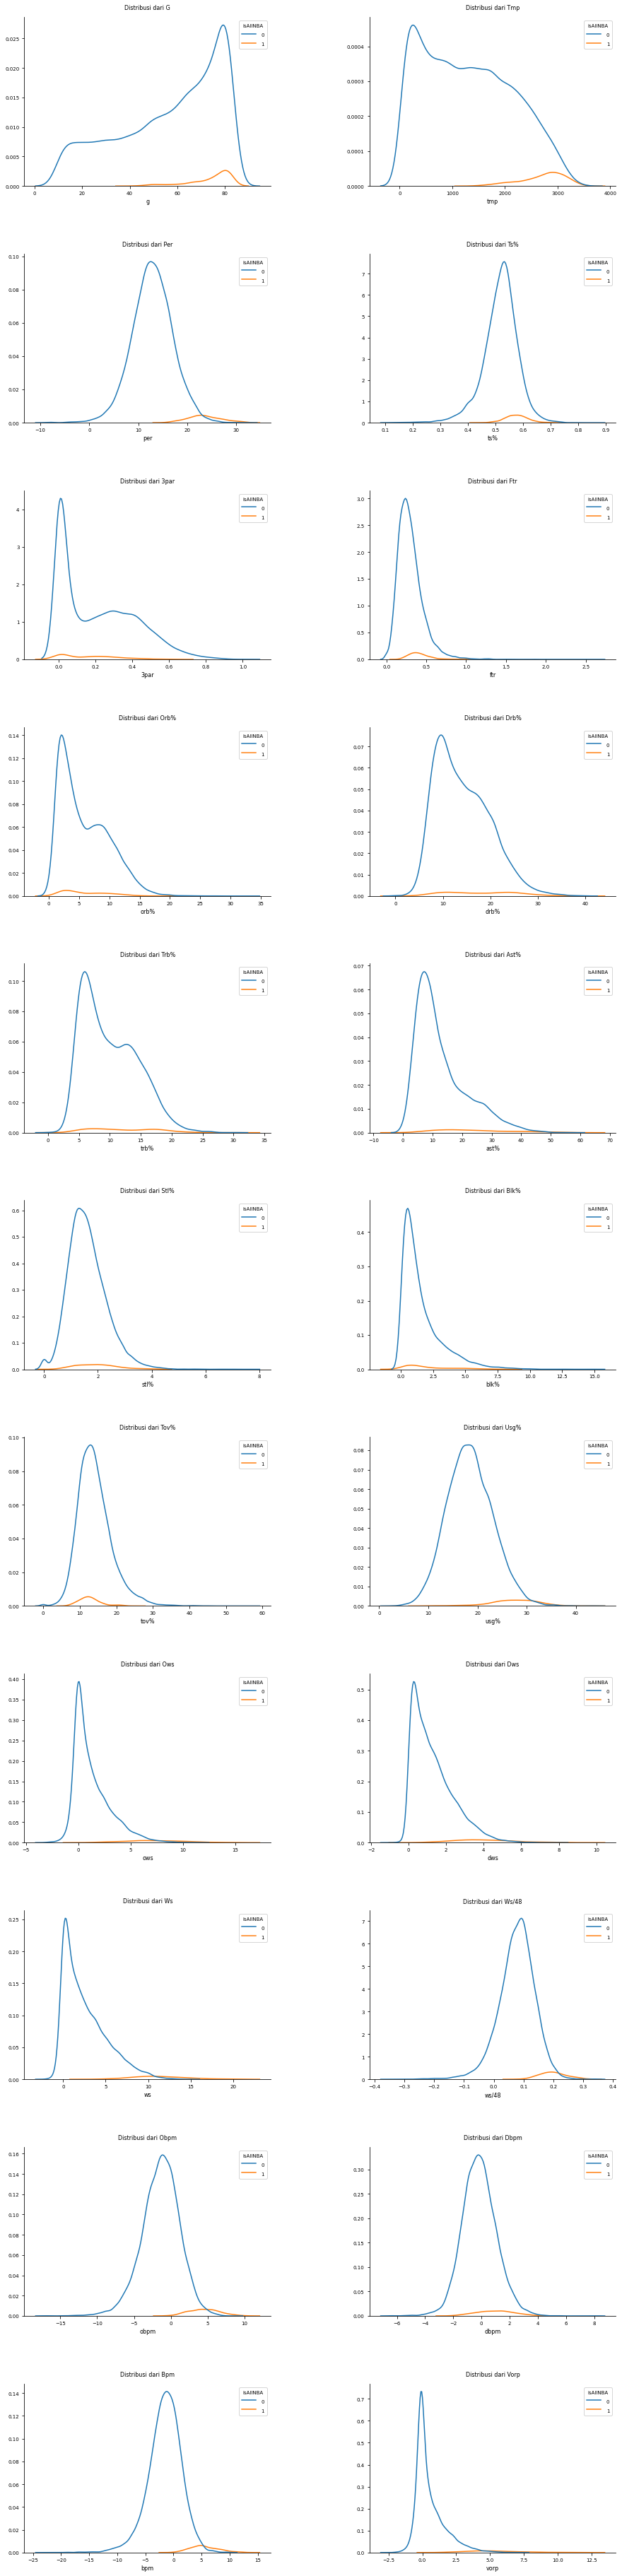

In [9]:
# Membuat subplot
plt.subplots(11, 2, figsize = (15, 66))

# Melakukan loop untuk kolom numerik yang bukan 'isAllNBA', 'pos_F', dan 'pos_G'
for n, col in enumerate(df.select_dtypes(include = np.number).columns.drop(['isAllNBA', 'pos_F', 'pos_G'])):
    # Mengatur posisi grafik
    plt.subplot(11, 2, n+1)

    # Membuat Kernel Density Estimate plot
    dis_plot = sns.kdeplot(df[col], hue = df['isAllNBA'])

    # Pengaturan plot
    plt.setp(dis_plot.get_legend().get_texts(), fontsize = '7')
    plt.setp(dis_plot.get_legend().get_title(), fontsize = '7')
    plt.setp(dis_plot.get_xticklabels(), fontsize = '7')
    plt.setp(dis_plot.get_yticklabels(), fontsize = '7')
    plt.ylabel(None)
    plt.xlabel(col, fontsize = 8)
    plt.title(f'Distribusi dari {str.capitalize(col)}',fontsize = 8, y = 1.02)
    sns.despine()

# Mengatur jarak antar subplot
plt.subplots_adjust(wspace = 0.4,hspace = 0.4)

### 2.3. Korelasi Pearson antar Fitur

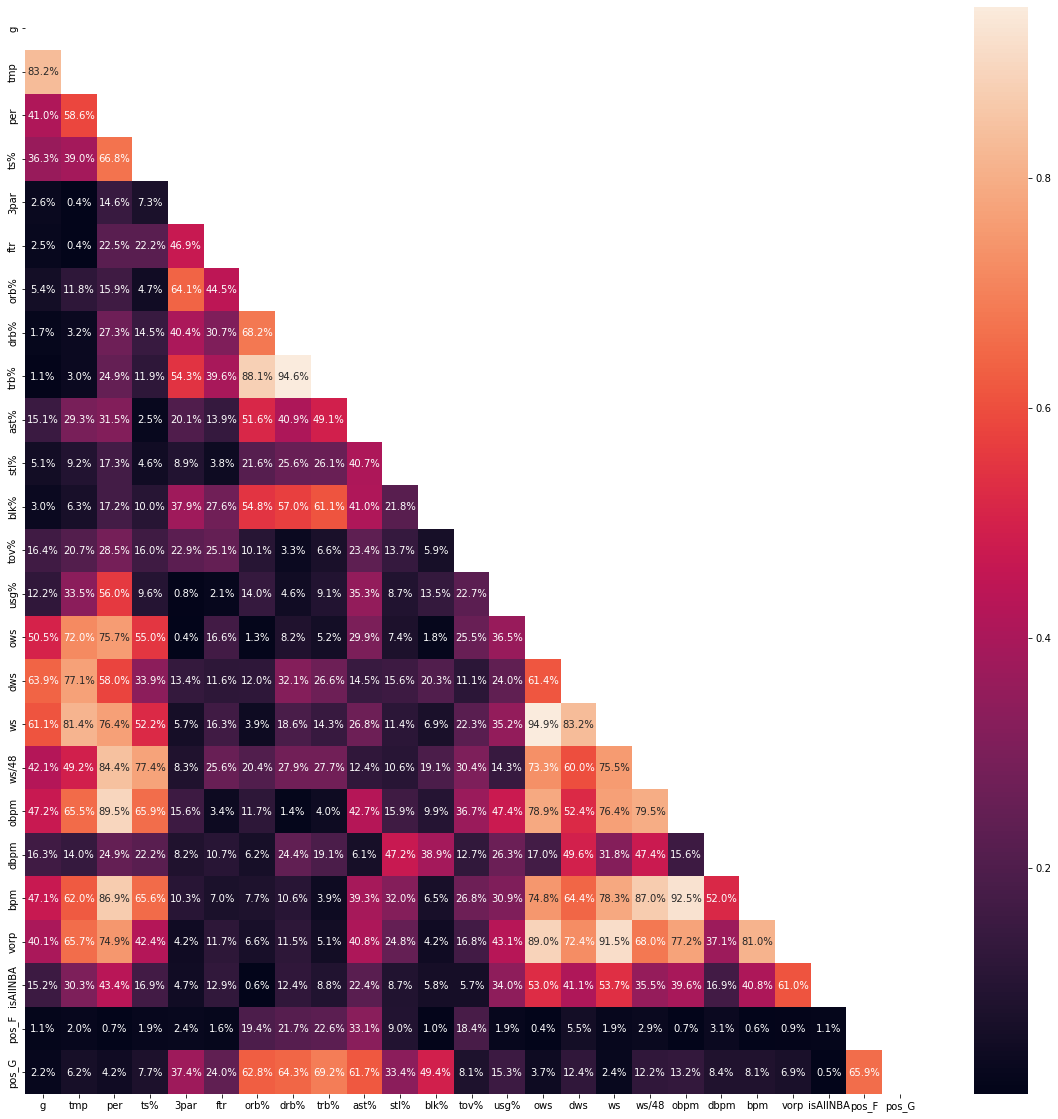

In [10]:
# Membuat figur untuk gambar
plt.figure(figsize = (20, 20))

# Membuat sebuah mask untuk index [i,i]
mask = np.triu(np.ones_like(df.corr().abs(), dtype = np.bool))

# Membuat heatmap dari data
sns.heatmap(df.corr().abs(), annot = True, fmt = '.1%', mask = mask)

# Memunculkan grafik
plt.show()

In [11]:
# Mencari korelasi fitur terhadap target
df.corr()['isAllNBA'].abs().drop(['isAllNBA']).to_frame().sort_values(by = 'isAllNBA', ascending = False).round(3) * 100

,isAllNBA
vorp,61.0
ws,53.7
ows,53.0
per,43.4
dws,41.1
bpm,40.8
obpm,39.6
ws/48,35.5
usg%,34.0
tmp,30.3


## 3. Pemodelan

### 3.1. Preparasi Data untuk Pemodelan

In [12]:
# Menentukan kolom target dan fitur
target = ['isAllNBA']
feature = df.select_dtypes(np.number).columns.drop([target[0]])

# Membagi dataset menjadi training dan dev set
X_train, X_dev, y_train, y_dev = train_test_split(df[feature],
                                                  df[target],
                                                  test_size = 0.25,
                                                  random_state = 0)

In [13]:
# Melakukan scaling data
X_train, scale = initial_scaler(X_train, exclude = ['pos_G', 'pos_F'])
X_dev = scaler(scale, X_dev, exclude = ['pos_G', 'pos_F'])

In [14]:
# Melakukan oversampling
oversample = SMOTENC(random_state = 0, categorical_features = [22, 23])
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

### 3.2. Pemodelan dengan Regresi Logistik

#### 3.2.1. Pengecekan Multikolinearitas Fitur

In [15]:
# Menggunakan calc_vif untuk mencari multikolinearitas di data
calc_vif(df.select_dtypes(include = np.number).drop([target[0]], axis = 1)).sort_values(by = 'VIF', ascending = False).reset_index(drop = True)

,Var,VIF
0,trb%,8909.834730
1,ws,7140.244053
2,bpm,4823.541760
3,drb%,4353.366512
4,obpm,3677.105794
5,ows,2770.349295
6,dws,1386.191956
7,orb%,933.551922
8,per,743.614103
9,dbpm,628.136906


In [16]:
# Menggunakan fungsi clean_vif untuk mencari kolom-kolom yang memiliki VIF <= 5
col_clean_vif = clean_vif(df.select_dtypes(include = np.number).drop([target[0]], axis = 1), 5)

# Memperlihatkan hasilnya
col_clean_vif

0     3par
1      ftr
2     ast%
3     blk%
4      ows
5      dws
6     obpm
7     dbpm
8    pos_F
Name: Var, dtype: object

#### 3.2.2. Pemodelan dengan Fitur yang Signifikan

In [17]:
# Menggunakan fungsi p_eliminate untuk mencari kolom yang signifikan
selected_col = p_eliminate(X_train_smote[col_clean_vif], y_train_smote)

,Var,p_val
0,3par,1.407058e-30
1,ftr,3.777650e-04
2,ast%,1.656629e-16
3,blk%,5.450597e-08
4,ows,1.129006e-06
5,dws,4.072397e-184
6,obpm,4.416453e-188
7,dbpm,5.215506e-49


In [18]:
# Menambahkan konstan ke dataset
X_train_smote_logreg = sm.add_constant(X_train_smote)
X_train_logreg = sm.add_constant(X_train)
X_dev_logreg = sm.add_constant(X_dev)

# Memilih kolom-kolom yang memiliki p-value lebih kecil atau sama dengan 0.05
X_train_smote_logreg_sel = X_train_smote_logreg[selected_col + ['const']]
X_train_logreg_sel = X_train_logreg[selected_col + ['const']]
X_dev_logreg_sel = X_dev_logreg[selected_col + ['const']]

# Pemodelan menggunakan Regresi Logistik
logreg = sm.Logit(y_train_smote[target[0]], X_train_smote_logreg_sel).fit(disp = False)

# Memunculkan ringkasan model
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               isAllNBA   No. Observations:                19654
Model:                          Logit   Df Residuals:                    19645
Method:                           MLE   Df Model:                            8
Date:                Tue, 24 May 2022   Pseudo R-squ.:                  0.8522
Time:                        00:03:07   Log-Likelihood:                -2013.5
converged:                       True   LL-Null:                       -13623.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
3par          -0.8738      0.076    -11.494      0.000      -1.023      -0.725
ftr            0.2279      0.064      3.555      0.000       0.102       0.354
ast%           0.4531      0.055      8.245      0.000       0.345       0.561
blk%           0.4075      0.075      5.436      0.000       0.261       0.554
ows            0.3110      0.064      4.868      0.000       0.186       0.436
dws            2.2268      0.077     28.937      0.000       2.076       2.378
obpm           4.1134      0.141     29.251      0.000       3.838       4.389
dbpm          -1.2571      0.085    -14.714      0.000      -1.425      -1.090
const         -8.3162      0.203    -40.896      0.000      -8.715      -7.918
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### 3.2.3. Evaluasi Data *Training*

In [19]:
# Mencari threshold probabilitas terbaik untuk Regresi Logistik
logreg_threshold = optimal_threshold(y_dev[target[0]], logreg.predict(X_dev_logreg_sel), n_candidates = 30, metric = 'f1', bound = (70,99))

Threshold terbaik adalah 0.92 dengan skor f1 77.03180212014135%


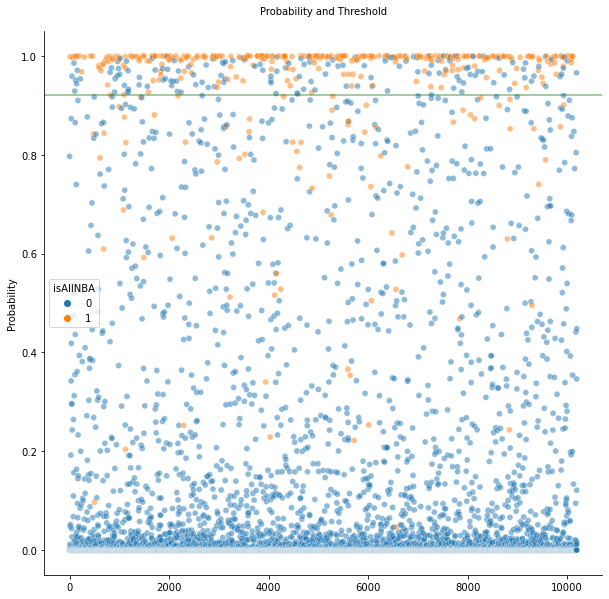

In [20]:
# Plotting hasil proabilitas data training
prob_threshold_plot(logreg.predict(X_train_logreg_sel), hue_tar = y_train['isAllNBA'], threshold = logreg_threshold)

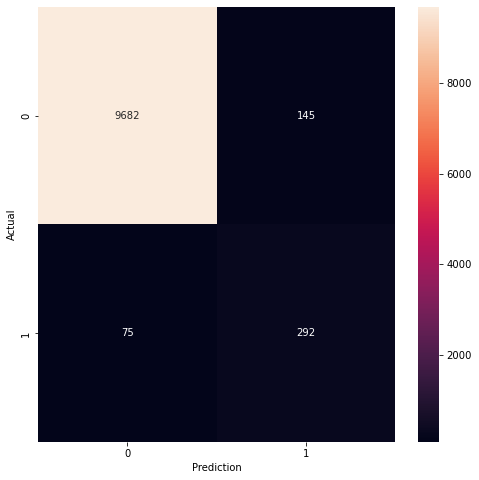

In [21]:
# Menggunakan threshold yang ditentukan untuk membulatkan probabilitas training
logreg_train_result = np.where(logreg.predict(X_train_logreg_sel) > logreg_threshold, 1, 0)

# Menampilkan heatmap dari confusion matrix
cm_heatmap(y_train[target[0]], logreg_train_result)

In [22]:
# Mengkalkulasi metrik dari probabilitas training
logreg_train_metrics = eval_metrics(y_train[target[0]], logreg_train_result)

# Menunjukan metrik-metrik evaluasi
logreg_train_metrics

{'tp': 292,
 'tn': 9682,
 'fn': 75,
 'fp': 145,
 'accuracy': 0.9784186776535216,
 'recall': 0.7956403269754768,
 'precision': 0.6681922196796338,
 'f1': 0.7263681592039801}

#### 3.2.4. Evaluasi Data *Development*

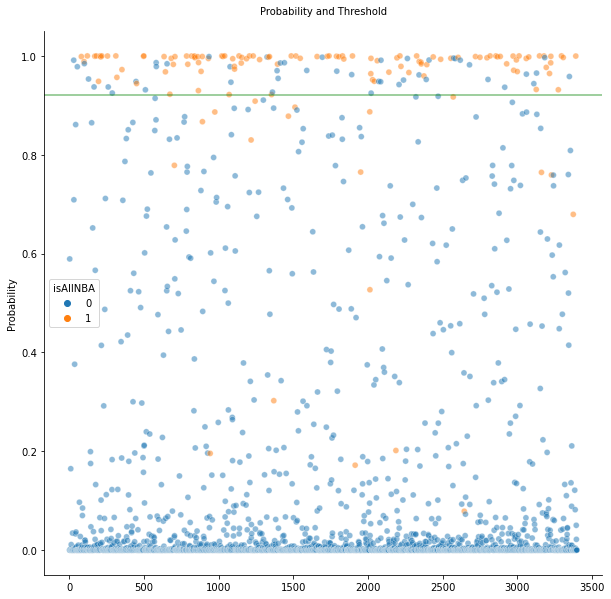

In [23]:
# Plotting hasil proabilitas data development
prob_threshold_plot(logreg.predict(X_dev_logreg_sel), hue_tar = y_dev['isAllNBA'], threshold = logreg_threshold)

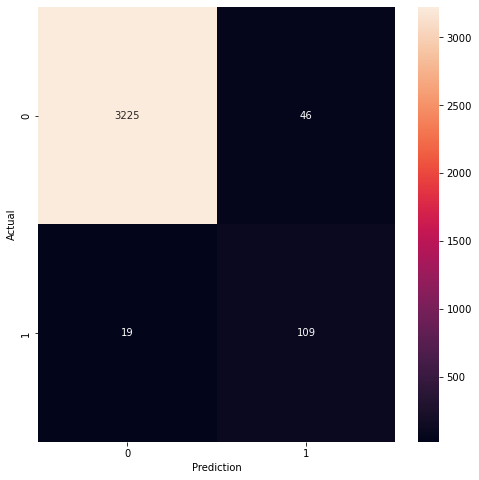

In [24]:
# Membulatkan prediksi data Development dengan threshold yang optimal
logreg_dev_result = np.where(logreg.predict(X_dev_logreg_sel) > logreg_threshold, 1, 0)

# Membuat heatmap dari confusion matrix
cm_heatmap(y_dev[target[0]], logreg_dev_result)

In [25]:
# Mengkalkulasikan metrik model dengan hasil prediksi data development
logreg_dev_metrics = eval_metrics(y_dev[target[0]], logreg_dev_result)

# Menunjukan hasil metrik dari model
logreg_dev_metrics

{'tp': 109,
 'tn': 3225,
 'fn': 19,
 'fp': 46,
 'accuracy': 0.980876728449544,
 'recall': 0.8515625,
 'precision': 0.7032258064516129,
 'f1': 0.7703180212014135}

### 3.3. Pemodelan dengan *Random Forest*

#### 3.3.1. Mencari Hyperparameter terbaik untuk *Random Forest*

In [26]:
# Mendefinisikan dictionary untuk hyperparameter yang akan dicari
hyperparameter = {
    'n_estimators': np.linspace(1, 100, 100, dtype = int).tolist(),
    'criterion': ('gini', 'entropy'),
    'max_leaf_nodes': list(range(2, 100)),
    'min_samples_split': [2, 3, 4]
}

# Menggunakan random searching untuk mencari hyperparameter terbaik
rf = RandomizedSearchCV(RandomForestClassifier(random_state = 0), 
                        hyperparameter, 
                        n_iter = 100,
                        scoring = 'f1', 
                        cv = 3,
                        random_state = 0,
                        verbose = 2,
                        n_jobs = 20)

# Melakukan fitting terhadap data training
rf.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=20,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, 31, ...],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                       

In [27]:
# Menampilkan skor terbaik dan parameter terbaik
print(f'Skor F1 terbaik adalah {rf.best_score_} '
      f'dengan hyperparameter terbaik {rf.best_params_["n_estimators"]} estimator, kriteria {rf.best_params_["criterion"]}, '
      f'minimum sampel dalam node untuk split {rf.best_params_["min_samples_split"]}, maximum leaf nodes {rf.best_params_["max_leaf_nodes"]}.')

Skor F1 terbaik adalah 0.9855314970845422 dengan hyperparameter terbaik 96 estimator, kriteria entropy, minimum sampel dalam node untuk split 3, maximum leaf nodes 95.


#### 3.3.2. Evaluasi Data *Training*

In [28]:
# Mencari threshold probabilitas terbaik untuk model Random Forest
rf_threshold = optimal_threshold(y_dev[target[0]], rf.predict_proba(X_dev)[:, 1], n_candidates = 30, metric = 'f1', bound = (70,99))

Threshold terbaik adalah 0.81 dengan skor f1 80.0%


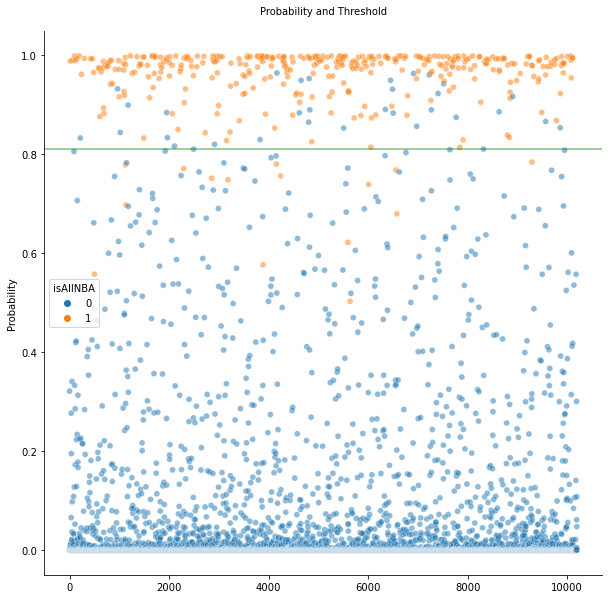

In [29]:
# Plotting hasil proabilitas data training
prob_threshold_plot(rf.predict_proba(X_train)[:, 1], hue_tar = y_train['isAllNBA'], threshold = rf_threshold)

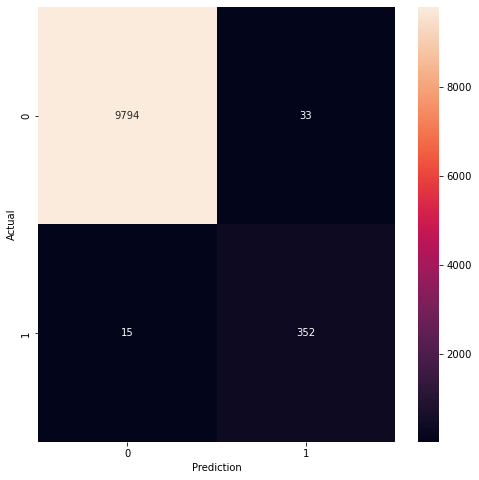

In [30]:
# Menggunakan threshold yang ditentukan untuk membulatkan probabilitas training
rf_train_result = np.where(rf.predict_proba(X_train)[:, 1] > rf_threshold, 1, 0)

# Menampilkan heatmap dari confusion matrix
cm_heatmap(y_train[target[0]], rf_train_result)

In [31]:
# Mengkalkulasi metrik dari probabilitas training
rf_train_metrics = eval_metrics(y_train[target[0]], rf_train_result)

# Menunjukan metrik-metrik evaluasi
rf_train_metrics

{'tp': 352,
 'tn': 9794,
 'fn': 15,
 'fp': 33,
 'accuracy': 0.9952913478516775,
 'recall': 0.9591280653950953,
 'precision': 0.9142857142857143,
 'f1': 0.9361702127659575}

#### 3.3.3. Evaluasi Data *Development*

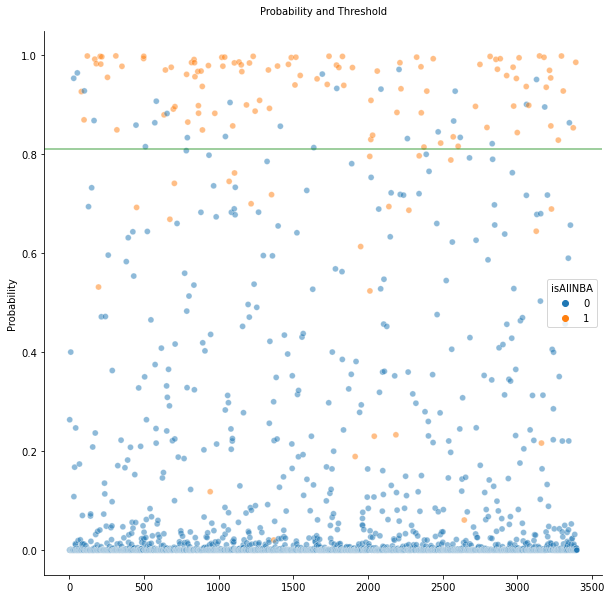

In [32]:
# Plotting hasil proabilitas data development
prob_threshold_plot(rf.predict_proba(X_dev)[:, 1], hue_tar = y_dev['isAllNBA'], threshold = rf_threshold)

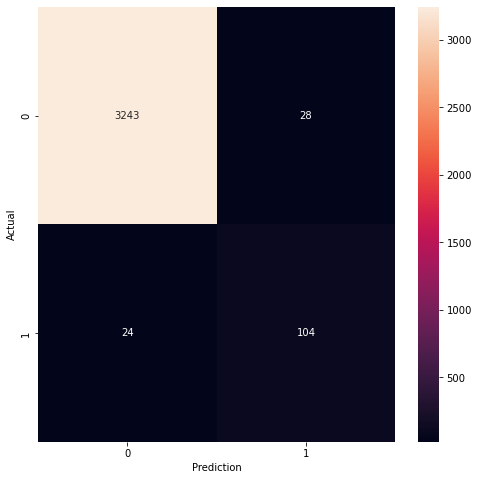

In [33]:
# Membulatkan prediksi data Development dengan threshold yang optimal
rf_dev_result = np.where(rf.predict_proba(X_dev)[:, 1] > rf_threshold, 1, 0)

# Membuat heatmap dari confusion matrix
cm_heatmap(y_dev[target[0]], rf_dev_result)

In [34]:
# Mengkalkulasikan metrik model dengan hasil prediksi data development
rf_dev_metrics = eval_metrics(y_dev[target[0]], rf_dev_result)

# Menunjukan hasil metrik dari model
rf_dev_metrics

{'tp': 104,
 'tn': 3243,
 'fn': 24,
 'fp': 28,
 'accuracy': 0.9847013827596351,
 'recall': 0.8125,
 'precision': 0.7878787878787878,
 'f1': 0.8}

### 3.4. Pemodelan dengan *Neural Network*

#### 3.4.1. Melakukan Pemodelan *Neural Network*

In [35]:
model_tf(X_train_smote, y_train_smote, X_dev, y_dev, epoch=150, threshold=0.9, savefile='Classifier.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 256)               6400      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                             

In [36]:
# Memasukan model yang diinginkan kembali ke notebook
nn = tf.keras.models.load_model('Classifier.h5')

# Memunculkan summary dari model yang dimasukan
nn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 256)               6400      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                             

In [37]:
# Menampilkan grafik progresi pelatihan
Image('History.png')

#### 3.4.4. Evaluasi Data *Training*

In [38]:
# Mencari threshold probabilitas terbaik untuk model Neural Network
nn_threshold = optimal_threshold(y_dev[target[0]], nn.predict(X_dev).reshape((-1,)), n_candidates = 30, metric = 'f1', bound = (70,99))

Threshold terbaik adalah 0.9 dengan skor f1 81.17154811715481%


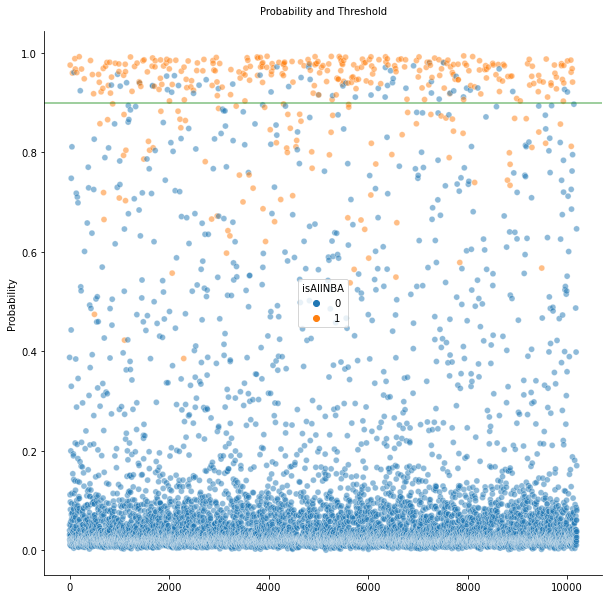

In [39]:
# Plotting hasil proabilitas data training
prob_threshold_plot(nn.predict(X_train).reshape((-1,)), hue_tar = y_train[target[0]], threshold = nn_threshold)

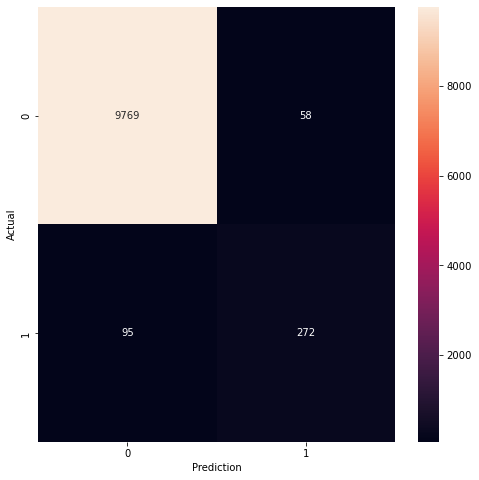

In [40]:
# Menggunakan threshold yang ditentukan untuk membulatkan probabilitas training
nn_train_result = np.where(nn.predict(X_train).reshape((-1,)) > nn_threshold, 1, 0)

# Menampilkan heatmap dari confusion matrix
cm_heatmap(y_train[target[0]], nn_train_result)

In [41]:
# Mengkalkulasi metrik dari probabilitas training
nn_train_metrics = eval_metrics(y_train[target[0]], nn_train_result)

# Menunjukan metrik-metrik evaluasi
nn_train_metrics

{'tp': 272,
 'tn': 9769,
 'fn': 95,
 'fp': 58,
 'accuracy': 0.9849911712772219,
 'recall': 0.7411444141689373,
 'precision': 0.8242424242424242,
 'f1': 0.7804878048780488}

#### 3.4.5. Evaluasi Data *Development*

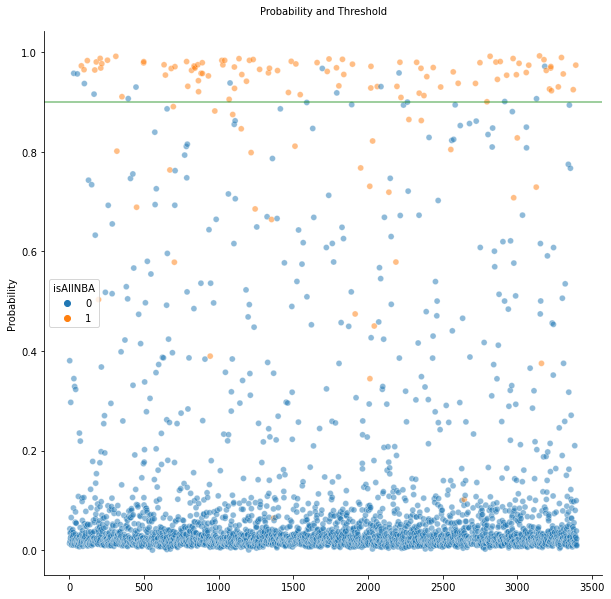

In [42]:
# Plotting hasil proabilitas data development
prob_threshold_plot(nn.predict(X_dev).reshape((-1,)), hue_tar = y_dev[target[0]], threshold = nn_threshold)

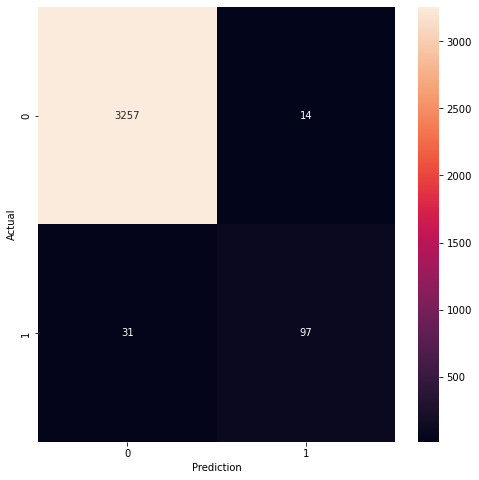

In [43]:
# Membulatkan prediksi data Development dengan threshold yang optimal
nn_dev_result = np.where(nn.predict(X_dev).reshape((-1,)) > nn_threshold, 1, 0)

# Membuat heatmap dari confusion matrix
cm_heatmap(y_dev[target[0]], nn_dev_result)

In [44]:
# Mengkalkulasikan metrik model dengan hasil prediksi data development
nn_dev_metrics = eval_metrics(y_dev[target[0]], nn_dev_result)

# Menunjukan hasil metrik dari model
nn_dev_metrics

{'tp': 97,
 'tn': 3257,
 'fn': 31,
 'fp': 14,
 'accuracy': 0.9867608120035305,
 'recall': 0.7578125,
 'precision': 0.8738738738738738,
 'f1': 0.8117154811715481}

## 4. Perbandingan Model

In [45]:
# Membuat dataframe dari semua metrik yang sudah dihitung
compare = create_compare_frame([logreg_train_metrics, rf_train_metrics, nn_train_metrics], [logreg_dev_metrics, rf_dev_metrics, nn_dev_metrics])

# Memunculkan dataframe yang dibuat
compare

,model,tp,tn,fn,fp,accuracy,recall,precision,f1,dataset
0,logistic regression,292,9682,75,145,0.978419,0.795640,0.668192,0.726368,train
1,random forest,352,9794,15,33,0.995291,0.959128,0.914286,0.936170,train
2,neural network,272,9769,95,58,0.984991,0.741144,0.824242,0.780488,train
3,logistic regression,109,3225,19,46,0.980877,0.851562,0.703226,0.770318,dev
4,random forest,104,3243,24,28,0.984701,0.812500,0.787879,0.800000,dev
5,neural network,97,3257,31,14,0.986761,0.757812,0.873874,0.811715,dev


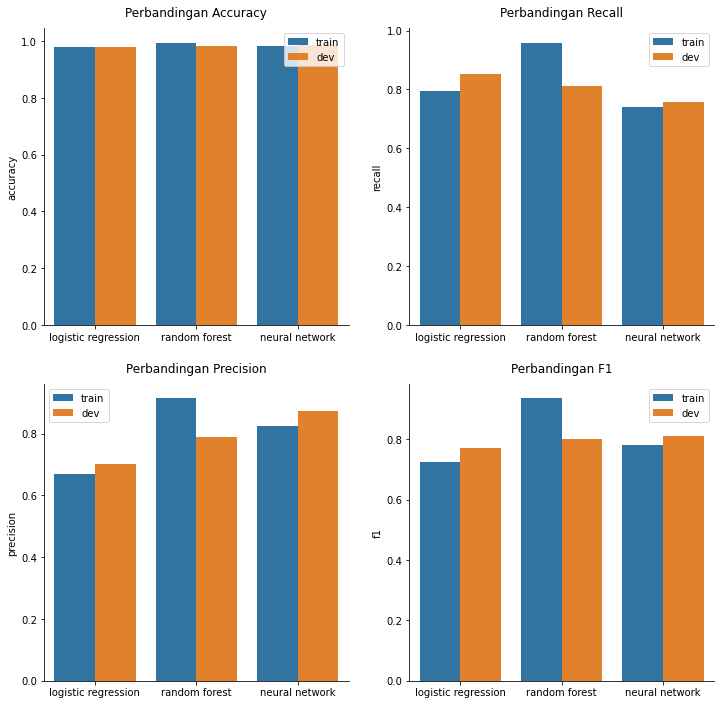

In [46]:
# Membuat 4 subplot
plt.subplots(2, 2, figsize = (12, 12))

# Melakukan looping untuk metrik yang diinginkan
for n, metric in enumerate(['accuracy', 'recall', 'precision', 'f1']):
    # Mengatur agar grafik sesuai dengan subplot yang kosong
    plt.subplot(2, 2, n+1)
    # Membuat grafik bar untuk metrik yang diinginkan
    sns.barplot(x = 'model', y = metric, hue = 'dataset', data = compare)
    # Pengaturan grafik
    plt.title(f'Perbandingan {str.title(metric)}', y = 1.02)
    plt.ylabel(metric)
    plt.xlabel('')
    plt.legend()
    sns.despine()

## 5. Uji Hipotesa

In [47]:
# Melakukan uji hipotesa dengan model terbaik
binom_test(nn_dev_metrics['accuracy'] * len(y_dev), n = len(y_dev), p = 0.5)

0.0

## 6. Menggunakan Model-Model untuk Memprediksi Pemenang Tahun 2021-2022

In [48]:
# Mengimpor data testing
raw_test = pd.read_csv('test.csv')

# Memunculkan 5 data pertama dari data mentah
raw_test.sample(10, random_state = 0)

,player,pos,age,tm,g,tmp,per,ts%,3par,ftr,...,usg%,ows,dws,ws,ws/48,obpm,dbpm,bpm,vorp,year
573,Paul Watson,SF,27,OKC,9,156,5.7,0.432,0.743,0.057,...,11.0,-0.1,0.1,0.0,0.001,-4.8,-0.6,-5.4,-0.1,2022
52,Keljin Blevins,SF,26,POR,31,349,4.8,0.410,0.649,0.099,...,16.5,-0.6,0.1,-0.5,-0.066,-5.6,-2.9,-8.5,-0.6,2022
528,Emanuel Terry,PF,25,PHO,3,18,-0.1,0.000,0.000,0.000,...,23.9,-0.1,0.0,-0.1,-0.256,-13.0,-5.3,-18.3,-0.1,2022
343,Théo Maledon,PG,20,OKC,51,908,10.6,0.500,0.473,0.315,...,20.3,-0.5,0.8,0.3,0.015,-3.7,-0.7,-4.4,-0.6,2022
55,Bol Bol,PF,22,DEN,14,81,13.5,0.565,0.148,0.185,...,18.0,0.0,0.1,0.1,0.065,-0.5,-0.4,-1.0,0.0,2022
62,Avery Bradley,SG,31,LAL,62,1406,7.8,0.550,0.600,0.051,...,12.1,0.3,0.9,1.2,0.040,-3.5,-0.1,-3.6,-0.6,2022
346,Tre Mann,PG,20,OKC,60,1367,10.2,0.501,0.463,0.139,...,22.0,-1.0,1.0,0.1,0.002,-3.3,-1.1,-4.3,-0.8,2022
304,Braxton Key,SF,24,TOT,11,197,13.7,0.508,0.292,0.181,...,19.4,-0.1,0.3,0.2,0.052,-3.8,0.6,-3.3,-0.1,2022
206,Javonte Green,SF,28,CHI,65,1519,14.0,0.637,0.311,0.295,...,11.5,2.9,1.5,4.4,0.139,-0.6,0.7,0.1,0.8,2022
405,Aaron Nesmith,SF,22,BOS,52,574,7.3,0.507,0.632,0.143,...,17.2,-0.4,0.9,0.4,0.038,-4.9,0.7,-4.3,-0.3,2022


In [49]:
# Memproses data testing
test = process_data(raw_test, dummies = False)

# Melakukan scaling ke kolom-kolom yang diinginkan di data testing
test_to_pred = process_data(raw_test, dummies = True)
test_to_pred = scaler(scale, test_to_pred, exclude = ['pos_G', 'pos_F'])

In [50]:
# Memprediksi data testing menggunakan Regresi Logistik
test['logreg_prob'] = logreg.predict(sm.add_constant(test_to_pred[selected_col]))

# Memprediksi data testing menggunakan Random Forest
test['rf_prob'] = rf.predict_proba(test_to_pred[feature])[:, 1]

# Memprediksi data testing menggunakan Neural Network
test['nn_prob'] = nn.predict(test_to_pred[feature])

In [51]:
# Memilih 15 pemain All-NBA sesuai dengan aturan pilih
select_all_nba(test, 'nn_prob')

,player,pos,nn_prob
0,Luka Dončić,G,0.972873
1,Trae Young,G,0.960927
2,Ja Morant,G,0.954217
3,Stephen Curry,G,0.945408
4,Devin Booker,G,0.927270
5,Donovan Mitchell,G,0.919056
6,Giannis Antetokounmpo,F,0.980322
7,Jayson Tatum,F,0.962585
8,Kevin Durant,F,0.955385
9,LeBron James,F,0.933147
